In [1]:
import pandas as pd

In [2]:
weather=pd.read_csv('Weather Training Data.csv')
weather.head(10)

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0
5,Row5,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0
6,Row6,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,1
7,Row7,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,1
8,Row8,Albury,12.6,21.0,3.6,NaN,NaN,SW,44.0,W,...,65.0,43.0,1001.2,1001.8,NaN,7.0,15.8,19.8,Yes,0
9,Row9,Albury,9.8,27.7,NaN,NaN,NaN,WNW,50.0,NaN,...,50.0,28.0,1013.4,1010.3,0.0,NaN,17.3,26.2,NaN,0


In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [4]:
#verifying percentage of missing values
weather.isnull().mean()*100

row ID            0.000000
Location          0.000000
MinTemp           0.445155
MaxTemp           0.231119
Rainfall          0.983761
Evaporation      42.737851
Sunshine         47.547128
WindGustDir       6.552715
WindGustSpeed     6.511516
WindDir9am        7.040074
WindDir3pm        2.660879
WindSpeed9am      0.939547
WindSpeed3pm      1.843925
Humidity9am       1.238997
Humidity3pm       2.518188
Pressure9am       9.795410
Pressure3pm       9.783351
Cloud9am         37.754733
Cloud3pm         40.196551
Temp9am           0.616986
Temp3pm           1.913260
RainToday         0.983761
RainTomorrow      0.000000
dtype: float64

In [5]:
#removing features with missing values more than 30% and irrelevant features
weather=weather.drop(['row ID','Location','Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1)

In [6]:
#fill missing continous features
continous_columns = weather.select_dtypes(include=['float64','int64']).drop(['RainTomorrow'],axis=1).columns
for c in continous_columns:
    mean = weather[c].mean()
    weather[c]=weather[c].fillna(mean)

#fill missing categorical features
categorical_columns = weather.select_dtypes(include=['object']).columns
for c in categorical_columns:
    most_frequent_value = weather[c].mode()[0]
    weather[c]=weather[c].fillna(most_frequent_value)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        99516 non-null  float64
 1   MaxTemp        99516 non-null  float64
 2   Rainfall       99516 non-null  float64
 3   WindGustDir    99516 non-null  object 
 4   WindGustSpeed  99516 non-null  float64
 5   WindDir9am     99516 non-null  object 
 6   WindDir3pm     99516 non-null  object 
 7   WindSpeed9am   99516 non-null  float64
 8   WindSpeed3pm   99516 non-null  float64
 9   Humidity9am    99516 non-null  float64
 10  Humidity3pm    99516 non-null  float64
 11  Pressure9am    99516 non-null  float64
 12  Pressure3pm    99516 non-null  float64
 13  Temp9am        99516 non-null  float64
 14  Temp3pm        99516 non-null  float64
 15  RainToday      99516 non-null  object 
 16  RainTomorrow   99516 non-null  int64  
dtypes: float64(12), int64(1), object(4)
memory usage: 

In [7]:
#Normalization continous features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
weather[continous_columns] = scaler.fit_transform(weather[continous_columns])

weather.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.191910,-0.044818,-0.207557,W,0.306357,W,WNW,0.676626,0.613461,0.112555,-1.434774,-1.478566,-1.223345,-0.010827,0.017285,No,0
1,-0.749029,0.264744,-0.278597,WNW,0.306357,NNW,WSW,-1.129170,0.384110,-1.311772,-1.288534,-1.049122,-1.118737,0.035548,0.381450,No,0
2,0.834885,1.277857,-0.160198,W,0.077905,ENE,NW,-0.790583,0.154759,0.692836,-0.898561,-1.019505,-1.387729,0.128300,1.168047,No,0
3,0.380098,0.912011,-0.254917,WNW,1.220168,W,W,0.563764,0.613461,-0.731491,-1.386028,-1.256440,-1.477393,0.561142,1.051514,No,0
4,-0.701982,0.489880,-0.278597,W,-0.379000,SSE,W,-0.903445,-0.189268,-1.100761,-1.581014,-0.634487,-0.775026,-0.103579,0.556249,No,0


In [8]:
#Convert categorical features to continous

from sklearn.preprocessing import LabelEncoder

label_encoders={}
for c in categorical_columns:
    label_encoders[c] = LabelEncoder()
    weather[c]=label_encoders[c].fit_transform(weather[c])

weather.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.191910,-0.044818,-0.207557,13,0.306357,13,14,0.676626,0.613461,0.112555,-1.434774,-1.478566,-1.223345,-0.010827,0.017285,0,0
1,-0.749029,0.264744,-0.278597,14,0.306357,6,15,-1.129170,0.384110,-1.311772,-1.288534,-1.049122,-1.118737,0.035548,0.381450,0,0
2,0.834885,1.277857,-0.160198,13,0.077905,1,7,-0.790583,0.154759,0.692836,-0.898561,-1.019505,-1.387729,0.128300,1.168047,0,0
3,0.380098,0.912011,-0.254917,14,1.220168,13,13,0.563764,0.613461,-0.731491,-1.386028,-1.256440,-1.477393,0.561142,1.051514,0,0
4,-0.701982,0.489880,-0.278597,13,-0.379000,10,13,-0.903445,-0.189268,-1.100761,-1.581014,-0.634487,-0.775026,-0.103579,0.556249,0,0


In [9]:
#Step 2. Divide features=X and target=Y
X=weather.drop(['RainTomorrow'],axis=1)
Y=weather['RainTomorrow']
X.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,0.191910,-0.044818,-0.207557,13,0.306357,13,14,0.676626,0.613461,0.112555,-1.434774,-1.478566,-1.223345,-0.010827,0.017285,0
1,-0.749029,0.264744,-0.278597,14,0.306357,6,15,-1.129170,0.384110,-1.311772,-1.288534,-1.049122,-1.118737,0.035548,0.381450,0
2,0.834885,1.277857,-0.160198,13,0.077905,1,7,-0.790583,0.154759,0.692836,-0.898561,-1.019505,-1.387729,0.128300,1.168047,0
3,0.380098,0.912011,-0.254917,14,1.220168,13,13,0.563764,0.613461,-0.731491,-1.386028,-1.256440,-1.477393,0.561142,1.051514,0
4,-0.701982,0.489880,-0.278597,13,-0.379000,10,13,-0.903445,-0.189268,-1.100761,-1.581014,-0.634487,-0.775026,-0.103579,0.556249,0


In [10]:
#Step 3. Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

In [11]:
# For test data 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


Seq_model = keras.Sequential()
Seq_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
Seq_model.add(Dense(128, activation='relu'))
Seq_model.add(Dense(64, activation='relu'))
Seq_model.add(Dense(32, activation='relu'))
Seq_model.add(Dense(8, activation='relu'))
Seq_model.add(Dense(1, activation='sigmoid'))
Seq_model.compile(loss= "binary_crossentropy" , optimizer="adam", metrics=["accuracy"])
Seq_model.summary()

2024-11-26 17:03:07.111812: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-26 17:03:07.119044: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-26 17:03:07.140816: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732654987.169366   24682 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732654987.176432   24682 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/home/arramos/BYUI/CS 499/weather-rainfall-prediction/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do n

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,297 (114.44 KB)

 Trainable params: 29,297 (114.44 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Train the model
history = Seq_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=100,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/30
797/797 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8287 - loss: 0.3984 - val_accuracy: 0.8428 - val_loss: 0.3671
Epoch 2/30
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8422 - loss: 0.3652 - val_accuracy: 0.8436 - val_loss: 0.3640
Epoch 3/30
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8443 - loss: 0.3605 - val_accuracy: 0.8470 - val_loss: 0.3585
Epoch 4/30
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8455 - loss: 0.3590 - val_accuracy: 0.8435 - val_loss: 0.3624
Epoch 5/30
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8454 - loss: 0.3534 - val_accuracy: 0.8451 - val_loss: 0.3556
Epoch 6/30
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8503 - loss: 0.3486 - val_accuracy: 0.8451 - val_loss: 0.3578
Epoch 7/30
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8500 - loss: 0.3493 - val_accuracy: 0.8465 - val_loss: 0.3537
Epoch 8/30
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8513 - loss: 0.3475 - val_accuracy: 0.

In [13]:
Seq_model_score = Seq_model.evaluate(X_test, y_test)
Seq_model_accuracy = round(Seq_model_score[1]*100, 2)
print("The classification accuracy of Sequential model is "+ str(Seq_model_accuracy)+"%")

622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8470 - loss: 0.3479
The classification accuracy of Sequential model is 84.78%


In [14]:
import numpy as np
neural_network_prediction=Seq_model.predict(X_test)
neural_network_prediction_array=[]
for n in neural_network_prediction:
    if n>0.5:
        neural_network_prediction_array.append(1)
    else:
        neural_network_prediction_array.append(0)
    #neural_network_prediction_array.append(int(n[0]))
#neural_network_prediction_serie=np.array(neural_network_prediction_array)


622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step


Text(0.5, 1.0, 'Neural Network Confusion Matrix')

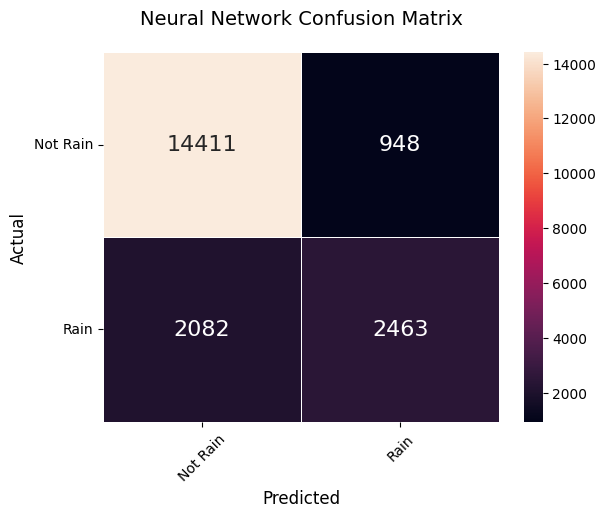

In [15]:
from sklearn.metrics import confusion_matrix

import seaborn as sns

cm = confusion_matrix(y_test,neural_network_prediction_array)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Predicted', fontsize=12)
axes.set_ylabel('Actual', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Neural Network Confusion Matrix', fontsize=14, pad=20)

In [24]:
def model_builder(hp):
    model = keras.Sequential()
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
     # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dense(10))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return model

In [25]:
#hyperparameter
import kerastuner as kt
tuner = kt.Hyperband(model_builder, # the hypermodel
                     objective='val_accuracy', # objective to optimize
max_epochs=10,
factor=3, # factor which you have seen above 
directory='dir', # directory to save logs 
project_name='khyperband')

In [26]:
stop_early = EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 00m 26s]
val_accuracy: 0.8396658897399902

Best val_accuracy So Far: 0.8482698202133179
Total elapsed time: 00h 05m 56s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 448 and the optimal learning rate for the optimizer
is 0.001.

